# Obtain American Airlines Stock Price Data from IEX Finance API

In [1]:
# Install IEX Finance module

# !pip install iexfinance

In [2]:
# Import dependencies

import pandas as pd
from iexfinance.stocks import Stock, get_historical_data, get_historical_intraday
from datetime import date, datetime, timedelta
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Function to retrieve api tokens

def get_tokens(path):
    with open(path) as f:
        return json.load(f)

In [4]:
# Retrieve api token(s) from local stored location

tokens = get_tokens("/Users/dougl/.secret/iex_api.json")

api_token = tokens['token']
api_secret_token = tokens['secret_token']

In [5]:
# getCompanyInfo returns a dictionary with the company symbol as a key and the info as the value 
# call to iex finance api to return company info for a symbol

def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token=api_token)
    company_info = stock_batch.get_company()
    return company_info

In [6]:
# Get company info for American Airlines

getCompanyInfo('AAL')

{'symbol': 'AAL',
 'companyName': 'American Airlines Group, Inc.',
 'exchange': 'NASDAQ',
 'industry': 'Airlines',
 'website': 'http://www.aa.com',
 'description': 'American Airlines Group, Inc. is a holding company, which engages in the operation of a network carrier through its principal wholly-owned mainline operating subsidiary, American. The firm offers air transportation for passengers and cargo. It operates through the following geographical segments: Department of Transportation Domestic; Department of Transportation Latin America; Department of Transportation Atlantic; and Department of Transportation Pacific. The company was founded on December 9, 2013 and is headquartered in Fort Worth, TX.',
 'CEO': 'William Douglas Parker',
 'securityName': 'American Airlines Group, Inc.',
 'issueType': 'cs',
 'sector': 'Transportation',
 'primarySicCode': 4512,
 'employees': 133700,
 'tags': ['Transportation', 'Airlines'],
 'address': '1 Skyview Drive',
 'address2': None,
 'state': 'TX',


In [7]:
# Test API to get intraday stock data for today

date = datetime(2020, 3, 10)

In [8]:
get_historical_intraday("AAL", date, output_format='pandas', token=api_token)

,date,label,high,low,average,volume,notional,numberOfTrades,marketHigh,marketLow,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
2020-03-10 09:30:00,2020-03-10,09:30 AM,15.890,15.720,15.799,10536,166460.570,42,15.900,15.670,15.803,827319,1.307433e+07,944,15.855,15.730,15.820,15.690,0.000000,0.000000
2020-03-10 09:31:00,2020-03-10,09:31 AM,15.700,15.500,15.600,2600,40560.000,21,15.740,15.500,15.624,294702,4.604507e+06,854,15.690,15.700,15.690,15.740,-0.012596,-0.011327
2020-03-10 09:32:00,2020-03-10,09:32 AM,15.720,15.610,15.639,2400,37534.500,11,15.750,15.594,15.685,208538,3.270865e+06,708,15.710,15.660,15.730,15.680,-0.010127,-0.007467
2020-03-10 09:33:00,2020-03-10,09:33 AM,15.770,15.600,15.642,7882,123290.660,45,15.780,15.600,15.665,215323,3.373107e+06,935,15.710,15.675,15.690,15.675,-0.009937,-0.008733
2020-03-10 09:34:00,2020-03-10,09:34 AM,15.720,15.540,15.618,8900,139003.500,69,15.730,15.540,15.631,123823,1.935470e+06,737,15.690,15.640,15.670,15.640,-0.011456,-0.010884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10 15:55:00,2020-03-10,3:55 PM,16.935,16.880,16.912,5758,97377.955,48,16.940,16.870,16.910,223560,3.780383e+06,893,16.930,16.890,16.940,16.900,0.070447,0.070050
2020-03-10 15:56:00,2020-03-10,3:56 PM,16.930,16.870,16.892,3985,67312.790,33,16.930,16.850,16.891,182611,3.084463e+06,831,16.890,16.925,16.890,16.925,0.069182,0.068848
2020-03-10 15:57:00,2020-03-10,3:57 PM,16.930,16.885,16.898,15200,256846.555,59,16.935,16.880,16.903,270786,4.577083e+06,1293,16.930,16.905,16.930,16.920,0.069561,0.069607
2020-03-10 15:58:00,2020-03-10,3:58 PM,16.970,16.910,16.945,6993,118494.625,62,16.970,16.910,16.942,259202,4.391332e+06,1259,16.925,16.960,16.930,16.958,0.072536,0.072075


In [9]:
# Get desired list of dates to make API intraday calls

start = datetime(2020, 1, 1)
end = datetime(2020, 3, 11)

delta = end - start

datelist = []
for i in range(delta.days + 1):
    datelist.append(start + timedelta(days=i))
    
datelist

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 5, 0, 0),
 datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 8, 0, 0),
 datetime.datetime(2020, 1, 9, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 12, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 14, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0),
 datetime.datetime(2020, 1, 16, 0, 0),
 datetime.datetime(2020, 1, 17, 0, 0),
 datetime.datetime(2020, 1, 18, 0, 0),
 datetime.datetime(2020, 1, 19, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 21, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0,

In [10]:
# Get data for each date in datelist from API

df = pd.DataFrame([])
for date in datelist:
    daily_df = get_historical_intraday("AAL", date, output_format='pandas', token=api_token)
    df=pd.concat([df, daily_df], axis=0)

In [11]:
# Preview data

df.head()

,date,label,high,low,average,volume,notional,numberOfTrades,marketHigh,marketLow,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
2020-01-02 09:30:00,2020-01-02,09:30 AM,28.990,28.990,28.990,100,2899.0,1,29.000,28.94,28.979,71966,2.085481e+06,104,28.990,28.990,28.980,28.995,0.000000,0.000000
2020-01-02 09:31:00,2020-01-02,09:31 AM,29.100,29.035,29.054,500,14527.0,5,29.140,28.97,29.055,63769,1.852838e+06,220,29.050,29.100,28.990,29.135,0.002208,0.002623
2020-01-02 09:32:00,2020-01-02,09:32 AM,29.185,29.135,29.156,600,17493.5,6,29.185,29.12,29.145,44639,1.301024e+06,187,29.135,29.185,29.135,29.185,0.005726,0.005728
2020-01-02 09:33:00,2020-01-02,09:33 AM,29.135,29.100,29.122,400,11649.0,4,29.195,29.10,29.153,55002,1.603474e+06,221,29.100,29.135,29.180,29.150,0.004553,0.006004
2020-01-02 09:34:00,2020-01-02,09:34 AM,29.165,29.125,29.150,300,8745.0,3,29.180,29.10,29.137,47071,1.371497e+06,167,29.160,29.125,29.150,29.110,0.005519,0.005452


In [12]:
# Preview data

df.tail()

,date,label,high,low,average,volume,notional,numberOfTrades,marketHigh,marketLow,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
2020-03-11 15:55:00,2020-03-11,3:55 PM,16.275,16.205,16.244,2551,41439.715,27,16.28,16.20,16.243,107687,1.749135e+06,624,16.205,16.260,16.200,16.26,0.008443,0.002283
2020-03-11 15:56:00,2020-03-11,3:56 PM,16.350,16.265,16.311,3893,63499.145,30,16.35,16.26,16.318,215767,3.520867e+06,1042,16.265,16.325,16.265,16.31,0.012602,0.006911
2020-03-11 15:57:00,2020-03-11,3:57 PM,16.380,16.285,16.335,4978,81317.370,34,16.38,16.26,16.330,225237,3.678138e+06,1094,16.295,16.315,16.310,16.31,0.014092,0.007651
2020-03-11 15:58:00,2020-03-11,3:58 PM,16.350,16.295,16.331,4274,69800.875,35,16.36,16.29,16.331,208474,3.404645e+06,878,16.310,16.330,16.310,16.33,0.013844,0.007713
2020-03-11 15:59:00,2020-03-11,3:59 PM,16.330,16.245,16.292,1676,27305.010,18,16.33,16.24,16.276,198538,3.231307e+06,829,16.330,16.250,16.325,16.26,0.011423,0.004319


In [13]:
df['Filled'] = df.average.isna()

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


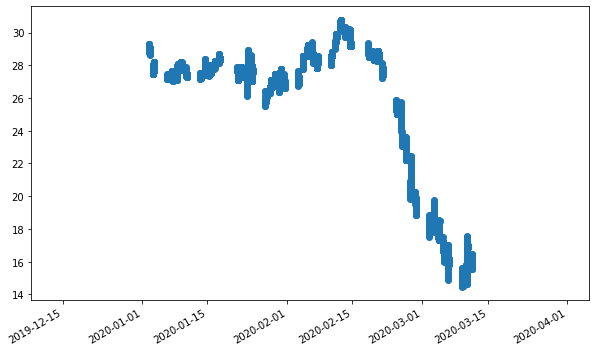

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.index, df.average)
fig = plt.gcf()
fig.autofmt_xdate()
plt.show();

In [18]:
# Resample time series at 60-min intervals, interpolate between missing time steps, dropna at beginning/end

ts = df.average.resample('60min').asfreq().interpolate().dropna()

In [19]:
ts

2020-01-02 10:00:00    29.010
2020-01-02 11:00:00    28.925
2020-01-02 12:00:00    28.890
2020-01-02 13:00:00    28.870
2020-01-02 14:00:00    28.795
                        ...  
2020-03-11 11:00:00    15.787
2020-03-11 12:00:00    15.589
2020-03-11 13:00:00    15.952
2020-03-11 14:00:00    15.824
2020-03-11 15:00:00    16.141
Freq: 60T, Name: average, Length: 1662, dtype: float64

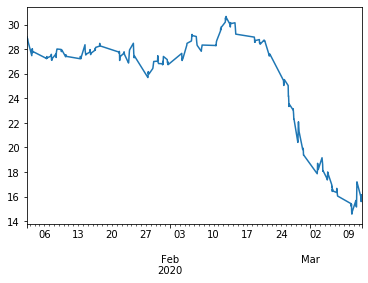

In [20]:
ts.plot()

In [22]:
# Save time series as csv

ts.to_csv('AAL_stock_ts.csv', index=True)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
